<a href="https://colab.research.google.com/github/gabrielnichio/ad-click-classification/blob/main/ad_click_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [114]:
import pandas as pd
import plotly.express as px

In [115]:
data = pd.read_csv("/content/ad_click_dataset.csv")

# Droping Null values

In [116]:
data.dropna(inplace=True)
data.reset_index(drop=True, inplace=True)
data.drop(columns=['id'], inplace=True)

# Droping useless columns

In [117]:
data.drop(columns='full_name', inplace=True)

In [118]:
data['click'] = data['click'].replace({1: 'yes', 0: 'no'})
data

,age,gender,device_type,ad_position,browsing_history,time_of_day,click
0,56.0,Female,Tablet,Bottom,News,Morning,yes
1,43.0,Male,Tablet,Bottom,Education,Afternoon,yes
2,37.0,Male,Mobile,Top,News,Evening,no
3,49.0,Male,Mobile,Top,News,Morning,yes
4,59.0,Female,Desktop,Bottom,Social Media,Morning,no
...,...,...,...,...,...,...,...
811,28.0,Female,Desktop,Bottom,News,Evening,yes
812,41.0,Non-Binary,Mobile,Side,Education,Night,yes
813,64.0,Non-Binary,Desktop,Top,Entertainment,Morning,no
814,52.0,Female,Desktop,Bottom,Shopping,Afternoon,yes


# Data Analysis

In [119]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 816 entries, 0 to 815
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   age               816 non-null    float64
 1   gender            816 non-null    object 
 2   device_type       816 non-null    object 
 3   ad_position       816 non-null    object 
 4   browsing_history  816 non-null    object 
 5   time_of_day       816 non-null    object 
 6   click             816 non-null    object 
dtypes: float64(1), object(6)
memory usage: 44.8+ KB


In [120]:
px.histogram(data, x='click', text_auto=True)

In [121]:
px.histogram(data, x='gender', text_auto=True, color='click', barmode='group')

In [122]:
px.histogram(data, x='time_of_day', text_auto=True, color='click', barmode='group')

In [123]:
px.histogram(data, x='browsing_history', text_auto=True, color='click', barmode='group')

In [124]:
px.box(data, x='age', color='click')

# Separating features and target


In [125]:
x = data.drop(columns="click")
y = data['click']

In [126]:
x

,age,gender,device_type,ad_position,browsing_history,time_of_day
0,56.0,Female,Tablet,Bottom,News,Morning
1,43.0,Male,Tablet,Bottom,Education,Afternoon
2,37.0,Male,Mobile,Top,News,Evening
3,49.0,Male,Mobile,Top,News,Morning
4,59.0,Female,Desktop,Bottom,Social Media,Morning
...,...,...,...,...,...,...
811,28.0,Female,Desktop,Bottom,News,Evening
812,41.0,Non-Binary,Mobile,Side,Education,Night
813,64.0,Non-Binary,Desktop,Top,Entertainment,Morning
814,52.0,Female,Desktop,Bottom,Shopping,Afternoon


# One Hot Encoding

In [127]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import make_column_transformer

In [128]:
column_names = x.columns

one_hot = make_column_transformer((
    OneHotEncoder(drop='if_binary', sparse_output=False),
    ["gender", "device_type", "ad_position", "browsing_history", "time_of_day"]
),
  remainder='passthrough',
  sparse_threshold=0
)

x = one_hot.fit_transform(x)

pd.DataFrame(x, columns=one_hot.get_feature_names_out(column_names))

,onehotencoder__gender_Female,onehotencoder__gender_Male,onehotencoder__gender_Non-Binary,onehotencoder__device_type_Desktop,onehotencoder__device_type_Mobile,onehotencoder__device_type_Tablet,onehotencoder__ad_position_Bottom,onehotencoder__ad_position_Side,onehotencoder__ad_position_Top,onehotencoder__browsing_history_Education,onehotencoder__browsing_history_Entertainment,onehotencoder__browsing_history_News,onehotencoder__browsing_history_Shopping,onehotencoder__browsing_history_Social Media,onehotencoder__time_of_day_Afternoon,onehotencoder__time_of_day_Evening,onehotencoder__time_of_day_Morning,onehotencoder__time_of_day_Night,remainder__age
0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,56.0
1,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,43.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,37.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,49.0
4,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,59.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
811,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,28.0
812,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,41.0
813,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,64.0
814,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,52.0


# LabelEncoder

In [129]:
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y

array([1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,

# Separating train and test set

In [130]:
from sklearn.model_selection import train_test_split

In [131]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=45)

# Dummy Classifier

In [132]:
from sklearn.dummy import DummyClassifier

In [133]:
dummy = DummyClassifier()
dummy.fit(x_train, y_train)

DummyClassifier()

In [134]:
dummy.predict(x_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1])

In [135]:
dummy.score(x_test, y_test)

0.6448979591836734

# Decision Tree

In [136]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.preprocessing import MinMaxScaler

In [137]:
tree = DecisionTreeClassifier()

tree.fit(x_train, y_train)

tree.predict(x_test)

tree.score(x_test, y_test)

0.8775510204081632

Checking overfitting

In [138]:
tree.score(x_train, y_train)

0.9982486865148862

Seems like is overfitting, model is memorizing the rules

# Plot the tree

In [139]:
import matplotlib.pyplot as plt

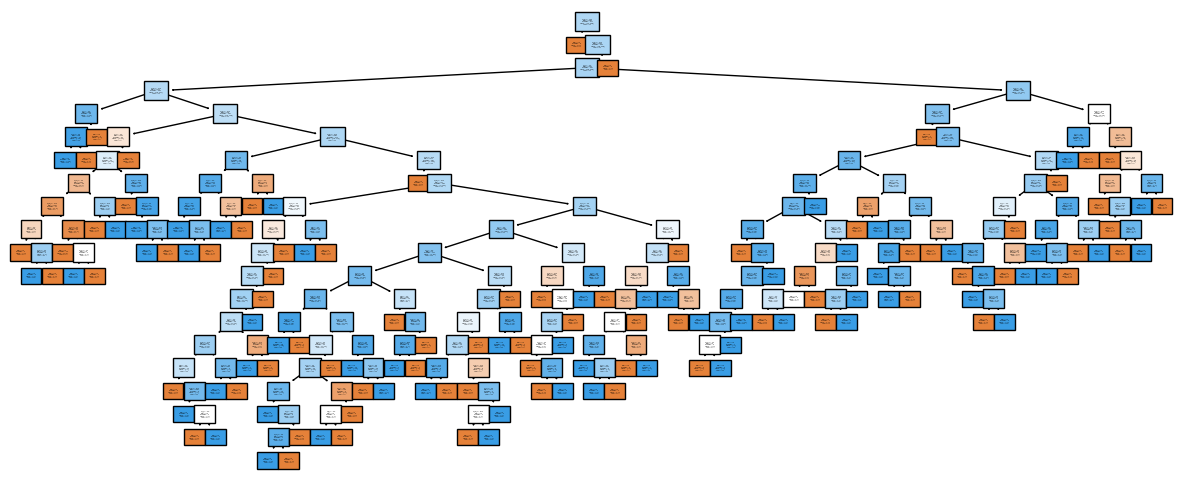

In [140]:
plt.figure(figsize = (15, 6))
plot_tree(tree, filled=True, fontsize=1, class_names=['no', 'yes'])
plt.show()

# Avoiding overfit by adjusting the max_depth parameter

In [141]:
norm = MinMaxScaler()

x_train_norm = norm.fit_transform(x_train)

In [142]:
tree = DecisionTreeClassifier(max_depth=6)

tree.fit(x_train_norm, y_train)

DecisionTreeClassifier(max_depth=6)

In [143]:
tree.score(x_train, y_train)

0.37302977232924694

In [145]:
x_test_norm = norm.transform(x_test)

tree.score(x_test_norm, y_test)

0.6938775510204082

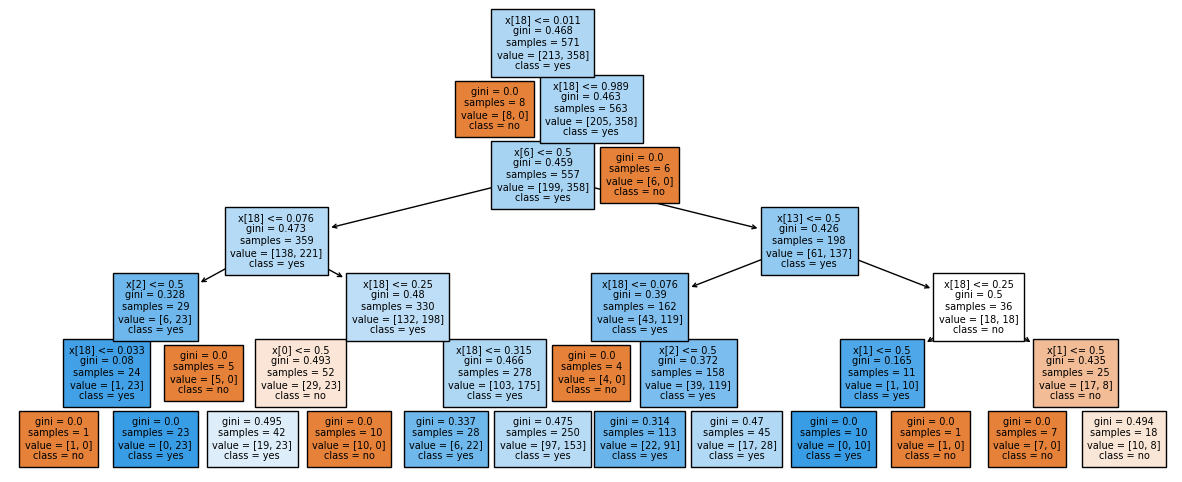

In [146]:
plt.figure(figsize = (15, 6))
plot_tree(tree, filled=True, fontsize=7, class_names=['no', 'yes'])
plt.show()

Hyperparameter tuning should be made in order to find the optimal parameter combination

We'll see that in the future, lets take small steps =)